# Word Embeddings Workshop

March 19, 2021

Instructor: Connor Gilroy, Department of Sociology, University of Washington  
TA: Nga Than, Sociology program, CUNY Graduate Center

## Introduction

The goal of this workshop is to give you an intuitive and practical introduction to what word embeddings are and what they can be used for in the social sciences.

You can find a short introductory slide deck [here](https://docs.google.com/presentation/d/1V4SaADerFMph9wB7pES76vYUWhIzvQ_LMpSyAIB6f_o/edit?usp=sharing).

## Packages used

This workshop primarily teaches and uses the **gensim** package. The main corpus (the 20 Newsgroups data set) comes from scikit-learn. 

An optional part of the tutorial also uses the *whatlies* package. For the exercises, you may find it helpful to load some common Python data science packages as well, if you have those installed in your environment.

In [1]:
import gensim
import sklearn

# import numpy as np
# import pandas as pd
# import matplotlib.pyplot as plt
# import seaborn as sns
# import altair as alt

## 1. Using a pretrained model (GloVe)

Things to know about a pretrained model: 

- What's the overall modeling approach?
- What vector size?
- What vocabulary size?
- What other parameters might affect substantive results? 
- What data was it trained on?

Some of those things will be well-documented or obvious, some won't be.

The GloVe models are originally documented [on a project page](https://nlp.stanford.edu/projects/glove/) from the Stanford NLP Group, but the gensim package also stores data for these and other models [in the gensim-data repository](https://github.com/RaRe-Technologies/gensim-data). We'll download and load a small pretrained model from the latter; click the link to read more about it. 

This model is around 66 MB. It's relatively small because each word is represented by a vector of only 50 numbers. Larger vectors (150-300 dimensions) are more common in practice.

In [2]:
import gensim.downloader as api
glove_embeddings = api.load('glove-wiki-gigaword-50')

We can confirm that these vectors do indeed have 50 dimensions:

In [3]:
glove_embeddings.vector_size

50

How many words are in the vocabulary?

In [4]:
len(glove_embeddings.vocab)

400000

This is a 400,000 x 50 matrix, which can be accessed through `glove_embeddings.vectors`: 

In [5]:
glove_embeddings.vectors.shape

(400000, 50)

If a word is in the vocabulary, you can extract its embedding from the model like this:

In [6]:
glove_embeddings["society"]

array([-0.32823  ,  0.60464  , -1.4341   , -0.69483  ,  0.37222  ,
        0.27362  , -0.20724  , -0.56052  ,  0.18415  , -0.37874  ,
        0.74674  ,  0.42706  ,  0.58073  ,  0.27155  , -0.72668  ,
       -0.069103 ,  0.44206  ,  0.3201   , -0.0098668,  0.37716  ,
        0.46938  ,  0.50435  , -0.37607  ,  0.22032  ,  0.13913  ,
       -1.2937   , -1.3741   , -1.1188   , -0.61808  ,  0.62293  ,
        2.81     , -0.1561   , -0.19444  , -1.5079   , -1.2498   ,
       -0.22614  , -0.65483  , -0.085504 ,  0.67726  , -0.021338 ,
       -0.18614  , -1.0214   ,  0.47834  ,  0.58785  ,  0.26813  ,
        0.86638  , -0.54169  , -0.32731  ,  0.032503 , -0.24343  ],
      dtype=float32)

Differerent word, different vector: 

In [7]:
glove_embeddings["individual"]

array([-0.11453 ,  0.73146 ,  0.11784 ,  0.36523 ,  0.98771 ,  0.80546 ,
        0.61489 , -0.051392,  0.60681 , -0.24692 ,  0.025087, -0.27323 ,
        0.25305 ,  0.042868,  0.33807 , -0.54849 ,  0.38897 , -0.13563 ,
        0.069399, -1.2723  ,  0.27797 , -0.43719 ,  0.22549 ,  0.28142 ,
        0.06787 , -0.68432 , -0.73477 , -1.2587  , -0.23347 , -0.25551 ,
        3.2248  ,  0.71511 ,  0.028063, -0.80542 , -0.23383 ,  0.034666,
        0.14269 ,  0.47143 , -0.70159 , -0.27487 ,  0.10003 , -1.0086  ,
        0.83195 ,  1.4715  , -0.10354 , -0.50154 , -0.25713 ,  0.15875 ,
       -0.24113 ,  0.028179], dtype=float32)

0.555 corresponds to 0.208, 0.493 corresponds to 0.895, and so on. (What do those individual positions mean? Not much on their own!)

This is what unlocks the key innovation of word embeddings: we can calculate the similarity or distance between two words using their vector representations. This is usually done with a metric called **cosine similarity**, which ranges from -1 to 1 (=perfectly similar).

In [8]:
glove_embeddings.similarity("society", "individual")

0.57124346

Of course, a word is exactly similar to itself: 

In [9]:
glove_embeddings.similarity("society", "society")

1.0

In [10]:
# try out calculating the similarities between a few other pairs of words here!

(Technical aside: cosine similarity is the dot product of two vectors, divided by the L2-norm for each vector.)

In [11]:
from numpy import dot
from numpy.linalg import norm

In [12]:
(dot(glove_embeddings["society"], glove_embeddings["individual"]) / 
    (norm(glove_embeddings["society"], ord=2) * norm(glove_embeddings["individual"], ord=2)))

0.5712435

To understand how a model respresents a particular word, we can look at which words are the most similar to it according to that model.

This is the foundation for making substantive claims about meaning: for instance, what a word means in a given set of documents, or how the meaning of a word has changed over time. 

Here are the 10 most similar words to "society" in the GloVe vocabulary: 

In [13]:
glove_embeddings.most_similar("society", topn=10)

[('societies', 0.862210750579834),
 ('institution', 0.7940563559532166),
 ('culture', 0.7808329463005066),
 ('social', 0.7668281197547913),
 ('established', 0.7649271488189697),
 ('cultural', 0.7567238211631775),
 ('community', 0.7481761574745178),
 ('science', 0.7377926707267761),
 ('establishment', 0.7374358177185059),
 ('profession', 0.735918402671814)]

And the 10 most similar words to "individual":

In [14]:
glove_embeddings.most_similar("individual", topn=10)

[('equal', 0.8033003211021423),
 ('number', 0.7950321435928345),
 ('represent', 0.7948423624038696),
 ('each', 0.7856720089912415),
 ('regardless', 0.7753193378448486),
 ('certain', 0.7704189419746399),
 ('placing', 0.766760528087616),
 ('individuals', 0.7637471556663513),
 ('these', 0.7541685700416565),
 ('different', 0.7537710666656494)]

Relations of similarity are the basic operation, but we're not limited to the individual word vectors we started with. We can do algebra on those vectors to build up new vectors that represent more complex meanings. For instance, we can take the *difference* between two vectors, in order to represent a binary opposition between them.  

Researchers build on this basic idea to create more robust vectors representing concepts that can be thought of in a binary way. Kozlowski et al 2019, for example, represent multiple dimensions of social class by averaging different pairs of antonyms. They then show how the associations between these dimensions change over the course of the 20th century.

The next example constructs an opposition between "society" and "individual" -- this will give us the words that are the closest to the "society" end of that dimension, or the "individual" end.

(You might be able to tell that these vectors were trained on Wikipedia entries, because the vocabulary includes many rare words -- we might get more interesting and meaningful results if we filtered the 400,000-word vocabulary first.)

In [15]:
glove_embeddings.most_similar(positive=["society"], negative=["individual"])

[('mattachine', 0.6032095551490784),
 ('anthroposophical', 0.5824963450431824),
 ('smolny', 0.5740677118301392),
 ('polytechnical', 0.5710374116897583),
 ('abyssinian', 0.5677530765533447),
 ('pompidou', 0.560329258441925),
 ('post-industrial', 0.5557958483695984),
 ('plaquemine', 0.5454120635986328),
 ('presbyterian', 0.5327621102333069),
 ('hereward', 0.5242972373962402)]

In [16]:
glove_embeddings.most_similar(positive=["individual"], negative=["society"])

[('100-200', 0.6291513442993164),
 ('apiece', 0.6258172988891602),
 ('lengths', 0.6198765635490417),
 ('finishers', 0.6118336319923401),
 ('contendership', 0.6085329055786133),
 ('onlytest', 0.6035232543945312),
 ('measly', 0.6017791032791138),
 ('6s', 0.6004780530929565),
 ('2,195', 0.5962419509887695),
 ('winnings', 0.5922033190727234)]

What's happening here, behind the scenes, is that one vector is being subtracted from the other. 

This creates a new vector, like this:

In [17]:
glove_embeddings["society"] - glove_embeddings["individual"]

array([-0.2137    , -0.12681997, -1.5519401 , -1.06006   , -0.61548996,
       -0.53183997, -0.82212996, -0.509128  , -0.42266   , -0.13182001,
        0.721653  ,  0.70028996,  0.32768002,  0.228682  , -1.06475   ,
        0.479387  ,  0.05309001,  0.45573002, -0.0792658 ,  1.6494601 ,
        0.19141   ,  0.94154   , -0.60156   , -0.06109999,  0.07126   ,
       -0.60938   , -0.63932997,  0.13989997, -0.38461003,  0.87844   ,
       -0.41480017, -0.87121   , -0.222503  , -0.70248   , -1.01597   ,
       -0.26080602, -0.79752   , -0.556934  ,  1.37885   ,  0.253532  ,
       -0.28617   , -0.01279998, -0.35361   , -0.88365006,  0.37167   ,
        1.3679199 , -0.28456   , -0.48606   ,  0.273633  , -0.271609  ],
      dtype=float32)

You might want to use that derived vector as part of your model, so here's how to add it into the model's overall set of vectors. 

(This next part is a bit technical and not substantively interesting, so I'll gloss over the details. For an alternative, check out the whatlies package below.) 

In [18]:
diff = glove_embeddings["society"] - glove_embeddings["individual"]
glove_embeddings.add("society - individual", diff)
glove_embeddings["society - individual"]

array([-0.2137    , -0.12681997, -1.5519401 , -1.06006   , -0.61548996,
       -0.53183997, -0.82212996, -0.509128  , -0.42266   , -0.13182001,
        0.721653  ,  0.70028996,  0.32768002,  0.228682  , -1.06475   ,
        0.479387  ,  0.05309001,  0.45573002, -0.0792658 ,  1.6494601 ,
        0.19141   ,  0.94154   , -0.60156   , -0.06109999,  0.07126   ,
       -0.60938   , -0.63932997,  0.13989997, -0.38461003,  0.87844   ,
       -0.41480017, -0.87121   , -0.222503  , -0.70248   , -1.01597   ,
       -0.26080602, -0.79752   , -0.556934  ,  1.37885   ,  0.253532  ,
       -0.28617   , -0.01279998, -0.35361   , -0.88365006,  0.37167   ,
        1.3679199 , -0.28456   , -0.48606   ,  0.273633  , -0.271609  ],
      dtype=float32)

In order for `most_similar()` to actually work with the "society - individual" vector, there's one more necessary step to run, in the next cell. 

(Why? Adding the vector doesn't automatically create an L2-normalized version of it, which `most_similar()` needs. `init_sims()` will recalculate, but only if the rest of the normed vectors are removed first.) 

In [19]:
glove_embeddings.vectors_norm = None
glove_embeddings.init_sims()

Now we can query this single vector and get the same results: 

In [20]:
glove_embeddings.most_similar(positive=["society - individual"])

[('mattachine', 0.6110344529151917),
 ('anthroposophical', 0.5894421935081482),
 ('smolny', 0.5745000243186951),
 ('polytechnical', 0.5712946057319641),
 ('abyssinian', 0.5659253001213074),
 ('post-industrial', 0.5655431151390076),
 ('pompidou', 0.5630674362182617),
 ('presbyterian', 0.5473666787147522),
 ('plaquemine', 0.5414626598358154),
 ('anti-vivisection', 0.5300812721252441)]

In [21]:
glove_embeddings.most_similar(negative=["society - individual"])

[('100-200', 0.6315953731536865),
 ('apiece', 0.6210841536521912),
 ('6s', 0.6087102890014648),
 ('contendership', 0.6076172590255737),
 ('measly', 0.6065807938575745),
 ('lengths', 0.6052266359329224),
 ('2,195', 0.6003236770629883),
 ('finishers', 0.5999947786331177),
 ('onlytest', 0.594523549079895),
 ('777-200s', 0.5921435952186584)]

### Exercise

(Adapted from Kozlowski et al 2019) Make a list of sports. Construct a "rich" vs "poor" dimension to proxy social class. Which sports have the strongest class associations in either direction?

In [22]:
# add to this list!
sports = ["hockey", "baseball", ] 

In [23]:
# create a rich - poor vector 
# then add it to the GloVe vectors

In [24]:
# calculate similarity between class dimension and each sport
sport_similarities = []
for sport in sports:
    pass # replace with code to calculate similarity - you 

## 2. Creating a locally trained model (Word2Vec)

If you're interested in word associations in a particular collection of texts, or if you suspect that those texts use language really differently from the sources pretrained models derive from (largely different kinds of contemporary internet data), then you might want to train your own model.

### Getting a corpus (20 Newsgroups)

To train a new model on a corpus, we need a corpus. We'll use the [20 Newsgroups data set](http://qwone.com/~jason/20Newsgroups/), which was created in 1995 for use in text-related machine learning research. Because the posts are partitioned into different groups, it's mainly used in classification and clustering applications. For an interesting contemporary example, which uses clusters of pretrained embeddings analogously to topic models, see [Sia et al 2020](http://arxiv.org/abs/2004.14914). 

(Sociologically, I find Usenet interesting as a historical precursor to contemporary online communities. Check out Nancy Baym's 1994 paper or her 2000 book if you'd like more ethnographic context, or Avery Dame-Griff 2019 if you'd like a historically-informed computational analysis.)

Running this code will download the 20 Newsgroups data set:

In [25]:
from sklearn.datasets import fetch_20newsgroups

twenty_newsgroups = fetch_20newsgroups(data_home="data",
                                       subset="all",
                                       shuffle=False,
                                       remove=('headers', 'footers', 'quotes'),
                                       download_if_missing=True)

The data set has about 18000 posts. The way the `remove` argument parses the posts is approximate, so some of those posts wind up being empty strings.

In [26]:
len(twenty_newsgroups.data)

18846

Let's look at the data by printing out a few posts at random.

In [27]:
print(twenty_newsgroups.data[0])


morgan and guzman will have era's 1 run higher than last year, and
 the cubs will be idiots and not pitch harkey as much as hibbard.
 castillo won't be good (i think he's a stud pitcher)


In [28]:
print(twenty_newsgroups.data[5])

Help!!!

I have an ADB graphicsd tablet which I want to connect to my
Quadra 950. Unfortunately, the 950 has only one ADB port and
it seems I would have to give up my mouse.

Please, can someone help me? I want to use the tablet as well as
the mouse (and the keyboard of course!!!).

Thanks in advance.


In [29]:
# Look at a few more!

You might notice some obvious themes or topics in the text. These are the groups included in the data set: 

In [30]:
twenty_newsgroups.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

Preprocessing is an important (and sometimes underappreciated) step in text analysis, which [can have downstream consequences](https://github.com/matthewjdenny/preText). 

We'll preprocess eacg Usenet post pretty minimally -- remove punctuation and special characters, lowercase, and tokenize it into a list of words: 

In [31]:
from gensim.utils import simple_preprocess

print(simple_preprocess(twenty_newsgroups.data[5], min_len=1, max_len=20))

['help', 'i', 'have', 'an', 'adb', 'graphicsd', 'tablet', 'which', 'i', 'want', 'to', 'connect', 'to', 'my', 'quadra', 'unfortunately', 'the', 'has', 'only', 'one', 'adb', 'port', 'and', 'it', 'seems', 'i', 'would', 'have', 'to', 'give', 'up', 'my', 'mouse', 'please', 'can', 'someone', 'help', 'me', 'i', 'want', 'to', 'use', 'the', 'tablet', 'as', 'well', 'as', 'the', 'mouse', 'and', 'the', 'keyboard', 'of', 'course', 'thanks', 'in', 'advance']


In [32]:
preprocessed_docs = []
for doc in twenty_newsgroups.data:
    preprocessed_docs.append(simple_preprocess(doc, min_len=1, max_len=20))

### Fitting the model

That was a lot of data work, but now we're ready to train a word2vec model. 

We'll use skip-gram (`sg=1`) with negative sampling (`negative=5`). We'll use a small vector size (`size=50`) because it's faster to train. We'll make a few passes over the data set (`iter=10`), and we'll ignore any words appearing less than 5 times total (`min_count=5`). 

To start with, let's try a small context window around each word (`window=5`). 

**Note:** This small vector size, combined with this small window size, isn't something we'd expect to yield a great model, but it's relatively quick to train. (On my laptop, that means less than two minutes -- it might vary for your machine. `workers=3` means that it runs on three processes.)

In [33]:
from gensim.models import Word2Vec

w2v_model1 = Word2Vec(sentences=preprocessed_docs, 
                      size=50, 
                      window=5, 
                      min_count=5,
                      workers=3,
                      sg=1, 
                      hs=0, 
                      negative=5,
                      iter=10)

Here are some basic properties of the trained model. Note that the embeddings themselves are accessed through the `wv` property. 

In [34]:
w2v_model1.corpus_count

18846

In [35]:
w2v_model1.total_train_time

114.06957440099978

In [36]:
w2v_model1.wv.vectors.shape

(26489, 50)

The vector for a given word will be a different string of numbers from the previous GloVe model. (And there's no reason for the dimensions to correspond, either!)

In [37]:
w2v_model1.wv["society"]

array([ 0.4648067 , -0.30961558, -0.4297171 ,  0.33018082, -0.00298255,
       -0.46494055,  0.1689612 , -0.21658695, -0.4500986 , -0.5325201 ,
       -0.09981444,  0.5783826 ,  0.49386802, -0.10718588, -0.15735006,
       -0.30751842,  0.3241669 , -0.18394656, -1.0072792 ,  0.3589885 ,
       -0.18563986, -0.30212823, -0.09242135,  0.8646745 ,  0.1605212 ,
       -0.01719386, -0.1941163 , -0.19161738, -0.2948527 ,  0.6057556 ,
       -0.26870143,  0.15840948, -0.15963495, -0.5886368 , -0.0726027 ,
       -0.61497533,  0.2819119 , -0.8079064 ,  0.67224276, -0.32638654,
       -0.4364008 , -0.42778316, -0.16592911,  0.37908164, -0.35536066,
       -0.29594222,  0.14621828, -0.14375633,  0.07059345, -0.5240879 ],
      dtype=float32)

Instead, we'll look at the most similar words again, to get a qualitative impression for whether this model is encoding a meaning similar to the GloVe model. 

In [38]:
w2v_model1.wv.most_similar("society")

[('secular', 0.7837257385253906),
 ('realm', 0.7744844555854797),
 ('ism', 0.7651664018630981),
 ('fertility', 0.7509962320327759),
 ('nation', 0.7491022348403931),
 ('communal', 0.7490184307098389),
 ('astronautical', 0.7445829510688782),
 ('humanist', 0.7444897294044495),
 ('philosophies', 0.7368832230567932),
 ('offshoots', 0.7347400784492493)]

Again, for the word "individual": 

In [39]:
w2v_model1.wv.most_similar("individual")

[('dignity', 0.7122915387153625),
 ('qualification', 0.708573579788208),
 ('legality', 0.7025988101959229),
 ('inalienable', 0.7006253004074097),
 ('exclusive', 0.6991674304008484),
 ('outweighs', 0.6921983957290649),
 ('rights', 0.6904846429824829),
 ('incur', 0.6857858300209045),
 ('individuals', 0.6842727661132812),
 ('basis', 0.6831294298171997)]

We won't repeat every step from Part 1 above. 

Instead, let's experiment with changing one parameter for training the model, the context window around each word. We'll fit a new model with `window=10`. 

In [40]:
w2v_model2 = Word2Vec(sentences=preprocessed_docs, 
                      size=50, 
                      window=10, 
                      min_count=5,
                      workers=3,
                      sg=1, 
                      hs=0, 
                      negative=5,
                      iter=10)

In [41]:
w2v_model2.total_train_time

184.1943228589999

In [42]:
w2v_model2.wv.most_similar("society")

[('footing', 0.796887218952179),
 ('secular', 0.7938194274902344),
 ('ism', 0.783584475517273),
 ('environmentalism', 0.7684481739997864),
 ('advocates', 0.7650079727172852),
 ('nation', 0.7641049027442932),
 ('fertility', 0.760269045829773),
 ('realm', 0.7589974999427795),
 ('cultural', 0.750839114189148),
 ('communal', 0.7494202852249146)]

Qualitatively, smaller windows (e.g. 5) tend to encode more syntactic similarities (words that are substitutes), whereas larger windows (e.g. 50) encode more semantic similarities (words that are topically similar). See Rodriguez and Spirling 2020 or [this PyData talk from 2017](https://www.youtube.com/watch?v=tAxrlAVw-Tk&t=648s).

### Exercise

(Adapted from Rodriguez and Spirling 2020) How correlated are those two word2vec models? Pick a focal word like "society" and calculate cosine similarity between that word and every word in the entire model vocabulary, for each model. Then calculate the correlation between those two measures.

(You might use `most_similar()` with the appropriate value for `topn`, or `similarity()` with a for-loop. The first is probably more efficient, but then you'll need to sort or join the two lists based on the words. Python data science packages like pandas may be helpful.) 

---

On your own, after the workshop: 

- Try a larger vector size (e.g. 100, 150, 200, 300)
- Try a larger window size (e.g. 20, 50) 
- Try reducing min_count (e.g. from 5 to 2)

**Note: all of these parameter changes make the model take longer to train!**

In [43]:
from scipy.stats import pearsonr

In [44]:
# write your code here

## 3. Visualizing embeddings (whatlies) [OPTIONAL]

The [whatlies package](https://rasahq.github.io/whatlies/) is relatively new (Warmerdam et al 2020); it's meant to facilitate exploring and visualizing embeddings.

It works as a wrapper around embeddings from different packages, including gensim. We'll turn the word2vec model from Part 3 into a `whatlies.EmbeddingSet`.

In [45]:
from whatlies import Embedding, EmbeddingSet

In [46]:
emb_w2v = EmbeddingSet.from_names_X(names=w2v_model1.wv.index2word, 
                                    X=w2v_model1.wv.vectors)

whatlies has built-in functions for plotting things like cosine similarities (built on the Python visualization packages matplotlib and altair):

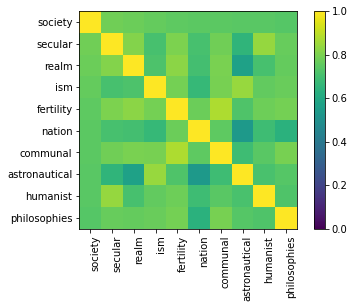

In [47]:
emb_w2v.embset_similar("society", n=10, metric="cosine").plot_similarity()

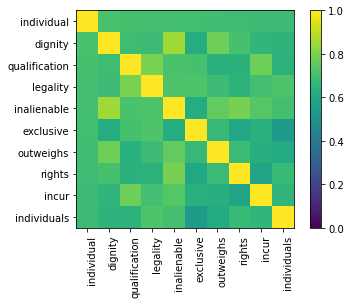

In [48]:
emb_w2v.embset_similar("individual", n=10, metric="cosine").plot_similarity()

It also implements vector algebra on embeddings in a nice way: 

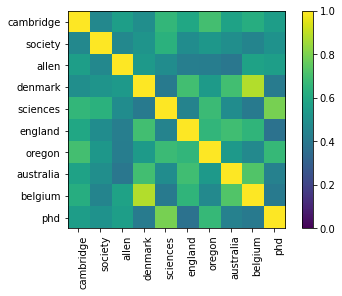

In [49]:
emb_w2v.embset_similar(emb_w2v["society"] - emb_w2v["individual"]).plot_similarity()

We can plot the similarities of different vectors against each other on the axes as well:

EmbSet.subset(society,nation,individual,exclusive)

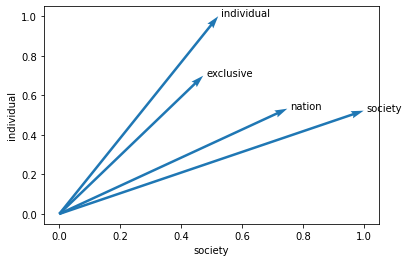

In [50]:
(emb_w2v["society", "nation", "individual", "exclusive"]
 .plot(x_axis="society", 
       y_axis="individual", 
       axis_metric="cosine_similarity"))

Or, we can transform the local vector space. Mouse over the points below to see the words.

(You could, of course, use any dimensionality reduction technique on the entire vector space as well.)

In [51]:
from whatlies.transformers import Pca

In [52]:
(emb_w2v
 .embset_similar("society", n=100, metric="cosine")
 .transform(Pca(2))
 .plot_interactive(annot=False))

alt.Chart(...)

### Exercise

Write code to convert the GloVe embeddings from a gensim `KeyedVectors` object to a whatlies `EmbeddingSet`. (Note: you don't need to use the `wv` attribute. Instead, access `glove_embeddings.index2word` directly. That's what the warning message "use self" means.)

Then, select some neighborhood of words (maybe a larger one than n=100) around a focal word (like "society"), transform those vectors with PCA, and plot them. 


In [53]:
# convert glove embeddings to an EmbeddingSet

In [54]:
# select, transform, and plot

## Wrapping up

### Main takeaways

- Word embeddings have become one tool in the computational text analysis toolkit.
- They've been successfully applied in the social sciences, in cases where the relational meanings of words and concepts are of substantive interest.

### What to do next

- Keep playing around in this notebook, with different words and parameters!
- Apply a pretrained model to or train a local model on your own corpus.
- Have a look at the code for some of the papers listed below.
- Read through my [experimental notebooks](https://ccgilroy.github.io/community-discourse/). I wrote those notebooks for myself, to explore how these methods could be applied to a topic I'm interested in, but you might find them useful.

The main additional topic I would have liked to cover in this workshop, given more time, is **document-level comparisons**. There are two interesting methods in gensim, Word Mover's Distance and Doc2Vec, which do pretty different things. I'm happy to discuss those methods during the Q&A. 

### Further reading

I've loosely categorized some relevant papers into three groups. I'd recommend starting with papers in the first category, though there are some interesting methodological ideas in the second and third categories.

You'll notice that **time** is the covariate of choice for many of the applied papers. I'm excited to see what other sources of variation researchers can come up with. 

Social science papers: 

- Kozlowski et al 2019 ("Geometry of Culture") ([GitHub](https://github.com/KnowledgeLab/GeometryofCulture/))
- Stoltz and Taylor 2019, Taylor and Stoltz 2020a, Taylor and Stoltz 2020b, Stoltz and Taylor forthcoming (Concept Mover's Distance and extensions) ([GitHub](https://github.com/dustinstoltz/CMDist/))
- Jones et al 2019 (gender stereotypes decrease over time) ([GitHub](https://github.com/ruhulsbu/StereotypicalGenderAssociationsInLanguage))
- Rheault and Cochrane 2020 (ideology and parliamentary corporas) ([GitHub](https://github.com/lrheault/partyembed))
- Rodriguez and Spirling 2020 (methodological comparisons for political science research) ([GitHub](https://github.com/ArthurSpirling/EmbeddingsPaper))
- Arseniev-Koehler and Foster 2020 (cultural learning and what it means to be fat) ([GitHub](https://github.com/arsena-k/Word2Vec-bias-extraction))
- Nelson 2021 (machine learning and intersectionality) ([GitHub](https://github.com/lknelson/measuring_intersectionality))

Social application papers from NLP/CS researchers: 

- Bamman et al 2014 (embedding decomposition and geographic variation) ([GitHub](https://github.com/dbamman/geoSGLM))
- Kulkarni et al 2015 (historical semantic change over time) ([GitHub](https://github.com/viveksck/langchangetrack))
- Hamilton et al 2016a, 2016b (histwords - semantic change) ([website](https://nlp.stanford.edu/projects/histwords/))
- Garg et al 2017 (stereotypes and semantic change) ([GitHub](https://github.com/nikhgarg/EmbeddingDynamicStereotypes))
- Gonen and Goldberg 2019 ("Lipstick on a pig" - "debiasing" embeddings in terms of gender) ([GitHub](https://github.com/gonenhila/gender_bias_lipstick))
- Giulianelli et al 2020 (contextual embeddings for semantic change) ([GitHub](https://github.com/glnmario/cwr4lsc))
- Mendelsohn et al 2020 (dehumanization and linguistic change)
- Waller and Anderson 2020 (community embeddings)
- Soni et al 2021 (language change in abolitionist newspapers) ([GitHub](https://github.com/sandeepsoni/semantic-leadership-network))

Fundamental NLP/CS papers:

- Mikolov et al 2013 (word2vec) ([gensim tutorial](https://radimrehurek.com/gensim/auto_examples/tutorials/run_word2vec.html))
- Pennington et al 2014 (GloVe) ([website](https://nlp.stanford.edu/projects/glove/))
- Dai and Le 2015 (paragraph vectors / doc2vec) ([gensim tutorial](https://radimrehurek.com/gensim/auto_examples/tutorials/run_doc2vec_lee.html))
- Kusner et al 2015 (Word Mover's Distance) ([gensim tutorial](https://radimrehurek.com/gensim/auto_examples/tutorials/run_wmd.html))
- Antoniak and Mimno 2018 (stability of embeddings) ([GitHub](https://github.com/maria-antoniak/word-embedding-stability))
- Sia et al 2020 (embeddings as topic models) ([GitHub](https://github.com/adalmia96/Cluster-Analysis))
- Warmerdam et al 2020 (whatlies package) ([website](https://rasahq.github.io/whatlies/))

## Contact information and acknowledgments

Connor Gilroy  
email: cgilroy at uw dot edu  
twitter: @ccgilroy

My thinking on word embeddings is indebted to SICSS-2017, a 2018 Text as Data course with John Wilkerson, many conversations (with Kate Stovel, Jeff Lockhart, Ian Kennedy, Nga Than, and others), and the code and papers listed above.

My research is partially supported by several grants, including an NIH NICHD training grant (T32 HD101442-01) to CSDE at the University of Washington and ARO Grant W911NF-19-1-0407.